# Run PyDDA
We can run multidoppler analyses on the May 20, 2025 case where we have CSAPR2 (ARM) and NEXRAD (NOAA) precipitation radar data.

## Imports

In [20]:
import pyart
import pydda
import glob
import pandas as pd
import xarray as xr
from datetime import timedelta
import matplotlib.pyplot as plt

## Run Multidoppler Analyses using Pydda
We follow the instructions from the PyDDA user's guide: https://openradarscience.org/PyDDA/user_guide/index.html

The data has been pre-gridded and cleaned (ie dealiased)

In [154]:
nexrad_grids = sorted(glob.glob("/data/project/ARM_Summer_School_2025/radar/dda/20250520/csapr2/*"))
csapr_grids = sorted(glob.glob("/data/project/ARM_Summer_School_2025/radar/dda/20250520/nexrad/*"))

_, sonde = pyart.io.read_arm_sonde("/data/project/ARM_Summer_School_2025/bnf/bnfsondewnpnM1.b1/bnfsondewnpnM1.b1.20250520.233000.cdf")

### Configure matching times
Taking a look at the volume files, match the times

In [274]:
time_matching = {"2230": {"csapr": 3,
                          "nexrad": 0},
                 "2240": {"csapr": 4,
                          "nexrad": 2},
                 "2250": {"csapr": 5,
                          "nexrad": 4},
                 "2300": {"csapr": 6,
                          "nexrad": 6},
                 "2310": {"csapr": 7,
                          "nexrad": 8},
                 "2320": {"csapr": 8,
                          "nexrad": 10},
                }

In [6]:
def process_dda(nexrad_file, csapr_file, outfile):
    """
    nexrad_file: str
        File containing the nexrad data to be used for multidoppler analyses
    csapr_file: str
        File containing the csapr2 data to be used fo multidoppler analyses
    outfile: str
        File to output the grid to
    """
    grid_nexrad = pydda.io.read_grid(nexrad_file)
    grid_csapr = pydda.io.read_grid(csapr_file)

    grid_csapr = pydda.initialization.make_constant_wind_field(grid_csapr,
                                                           (0.0, 0.0, 0.0),
                                                           vel_field='mean_doppler_velocity')
    grids_out, _ = pydda.retrieval.get_dd_wind_field([grid_csapr, grid_nexrad],
                                                     Co=1,
                                                     Cm=500.,
                                                     Cx=1e-2,
                                                     Cy=1e-2,
                                                     Cz=1e-2,
                                                     frz=4000.0,
                                                     u_back=sonde.u_wind,
                                                     v_back=sonde.v_wind,
                                                     z_back=sonde.height,
                                                     refl_field='reflectivity',
                                                     wind_tol=0.5,
                                                     max_iterations=50,
                                                     filter_window=15,
                                                     filter_order=3,
                                                     engine='tensorflow')
    pydda.vis.plot_horiz_xsection_quiver(grids_out,
                                     level=8,
                                     cmap='ChaseSpectral',
                                     vmin=-10,
                                     vmax=70,
                                     quiverkey_len=7.5,
                                     background_field='reflectivity',
                                     bg_grid_no=1,
                                     w_vel_contours=[1, 2, 5, 10, 20, 30],
                                     quiver_spacing_x_km=2.5,
                                     quiver_spacing_y_km=2.5,
                                     quiverkey_loc='bottom_right')
    plt.ylim(0, 45)
    plt.xlim(-25, 20)
    plt.show()
    plt.close()
    
    out = grids_out[0]
    out.to_netcdf(outfile)
    print(outfile)
    

ERROR! Session/line number was not unique in database. History logging moved to new session 341
Interpolating sounding to radar grid
Interpolated U field:
tf.Tensor(
[       nan  4.5307264 11.4344845 15.301979  21.562355  23.875206
 26.482462  25.819971  28.538422  30.        30.381481  32.848923
 33.17398   32.373234  27.429451  28.3827    30.325945  27.802431
 21.681234  22.78611   25.718634  28.756817  26.373087  26.310108
 25.113314  33.57475   34.139362  39.02031   30.191198  27.088177 ], shape=(30,), dtype=float32)
Interpolated V field:
tf.Tensor(
[           nan  9.7008705e+00  1.5174075e+01  1.4776947e+01
  1.0986574e+01  9.1648293e+00  6.1139612e+00  5.0188894e+00
  1.4956403e+00 -3.5774642e-07  1.0609528e+00  2.8739071e+00
  4.6623039e+00  7.4739542e+00  1.4375213e+00  9.9115330e-01
  2.1205988e+00  4.5414308e-01 -8.7597809e+00 -7.9570425e-01
 -4.9991927e+00 -5.0706024e+00 -6.0887113e+00 -1.1714015e+01
 -9.6400938e+00 -4.7186298e+00 -6.6360159e+00 -7.5847745e+00
 -2.6413875e+

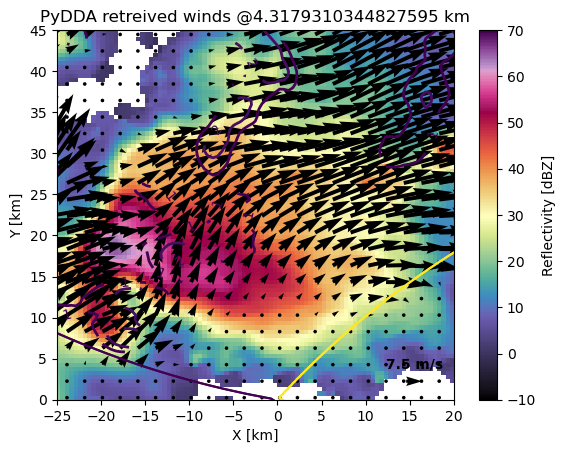

pydda-202505202230.nc
Interpolating sounding to radar grid
Interpolated U field:
tf.Tensor(
[       nan  4.5307264 11.4344845 15.301979  21.562355  23.875206
 26.482462  25.819971  28.538422  30.        30.381481  32.848923
 33.17398   32.373234  27.429451  28.3827    30.325945  27.802431
 21.681234  22.78611   25.718634  28.756817  26.373087  26.310108
 25.113314  33.57475   34.139362  39.02031   30.191198  27.088177 ], shape=(30,), dtype=float32)
Interpolated V field:
tf.Tensor(
[           nan  9.7008705e+00  1.5174075e+01  1.4776947e+01
  1.0986574e+01  9.1648293e+00  6.1139612e+00  5.0188894e+00
  1.4956403e+00 -3.5774642e-07  1.0609528e+00  2.8739071e+00
  4.6623039e+00  7.4739542e+00  1.4375213e+00  9.9115330e-01
  2.1205988e+00  4.5414308e-01 -8.7597809e+00 -7.9570425e-01
 -4.9991927e+00 -5.0706024e+00 -6.0887113e+00 -1.1714015e+01
 -9.6400938e+00 -4.7186298e+00 -6.6360159e+00 -7.5847745e+00
 -2.6413875e+00  1.4196359e+00], shape=(30,), dtype=float32)
Grid levels:
[    0.      

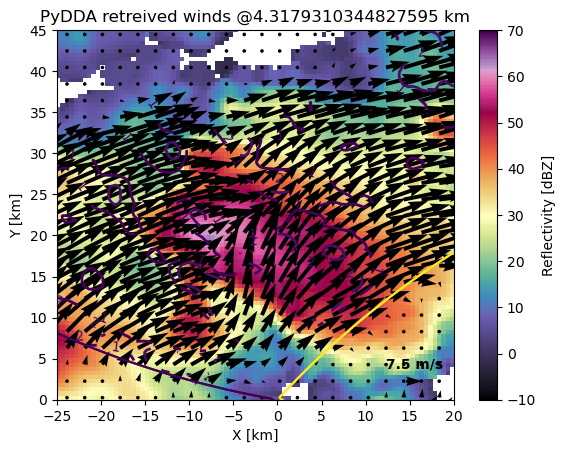

pydda-202505202240.nc
Interpolating sounding to radar grid
Interpolated U field:
tf.Tensor(
[       nan  4.5307264 11.4344845 15.301979  21.562355  23.875206
 26.482462  25.819971  28.538422  30.        30.381481  32.848923
 33.17398   32.373234  27.429451  28.3827    30.325945  27.802431
 21.681234  22.78611   25.718634  28.756817  26.373087  26.310108
 25.113314  33.57475   34.139362  39.02031   30.191198  27.088177 ], shape=(30,), dtype=float32)
Interpolated V field:
tf.Tensor(
[           nan  9.7008705e+00  1.5174075e+01  1.4776947e+01
  1.0986574e+01  9.1648293e+00  6.1139612e+00  5.0188894e+00
  1.4956403e+00 -3.5774642e-07  1.0609528e+00  2.8739071e+00
  4.6623039e+00  7.4739542e+00  1.4375213e+00  9.9115330e-01
  2.1205988e+00  4.5414308e-01 -8.7597809e+00 -7.9570425e-01
 -4.9991927e+00 -5.0706024e+00 -6.0887113e+00 -1.1714015e+01
 -9.6400938e+00 -4.7186298e+00 -6.6360159e+00 -7.5847745e+00
 -2.6413875e+00  1.4196359e+00], shape=(30,), dtype=float32)
Grid levels:
[    0.      

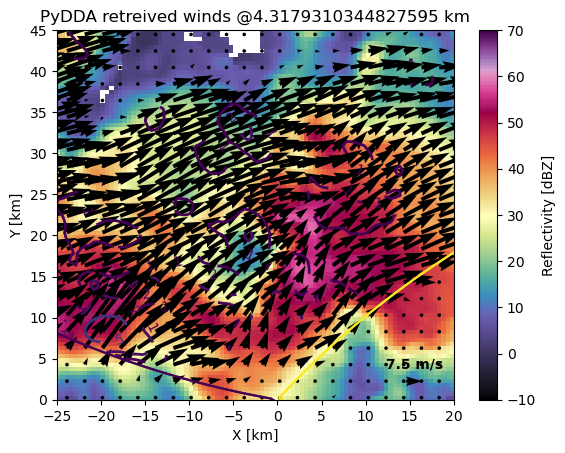

pydda-202505202250.nc
Interpolating sounding to radar grid
Interpolated U field:
tf.Tensor(
[       nan  4.5307264 11.4344845 15.301979  21.562355  23.875206
 26.482462  25.819971  28.538422  30.        30.381481  32.848923
 33.17398   32.373234  27.429451  28.3827    30.325945  27.802431
 21.681234  22.78611   25.718634  28.756817  26.373087  26.310108
 25.113314  33.57475   34.139362  39.02031   30.191198  27.088177 ], shape=(30,), dtype=float32)
Interpolated V field:
tf.Tensor(
[           nan  9.7008705e+00  1.5174075e+01  1.4776947e+01
  1.0986574e+01  9.1648293e+00  6.1139612e+00  5.0188894e+00
  1.4956403e+00 -3.5774642e-07  1.0609528e+00  2.8739071e+00
  4.6623039e+00  7.4739542e+00  1.4375213e+00  9.9115330e-01
  2.1205988e+00  4.5414308e-01 -8.7597809e+00 -7.9570425e-01
 -4.9991927e+00 -5.0706024e+00 -6.0887113e+00 -1.1714015e+01
 -9.6400938e+00 -4.7186298e+00 -6.6360159e+00 -7.5847745e+00
 -2.6413875e+00  1.4196359e+00], shape=(30,), dtype=float32)
Grid levels:
[    0.      

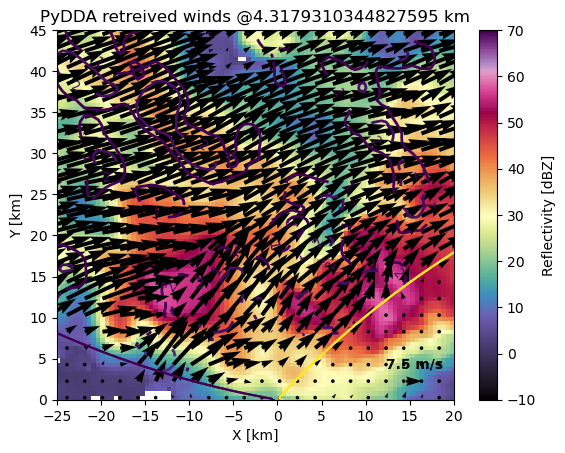

pydda-202505202300.nc
Interpolating sounding to radar grid
Interpolated U field:
tf.Tensor(
[       nan  4.5307264 11.4344845 15.301979  21.562355  23.875206
 26.482462  25.819971  28.538422  30.        30.381481  32.848923
 33.17398   32.373234  27.429451  28.3827    30.325945  27.802431
 21.681234  22.78611   25.718634  28.756817  26.373087  26.310108
 25.113314  33.57475   34.139362  39.02031   30.191198  27.088177 ], shape=(30,), dtype=float32)
Interpolated V field:
tf.Tensor(
[           nan  9.7008705e+00  1.5174075e+01  1.4776947e+01
  1.0986574e+01  9.1648293e+00  6.1139612e+00  5.0188894e+00
  1.4956403e+00 -3.5774642e-07  1.0609528e+00  2.8739071e+00
  4.6623039e+00  7.4739542e+00  1.4375213e+00  9.9115330e-01
  2.1205988e+00  4.5414308e-01 -8.7597809e+00 -7.9570425e-01
 -4.9991927e+00 -5.0706024e+00 -6.0887113e+00 -1.1714015e+01
 -9.6400938e+00 -4.7186298e+00 -6.6360159e+00 -7.5847745e+00
 -2.6413875e+00  1.4196359e+00], shape=(30,), dtype=float32)
Grid levels:
[    0.      

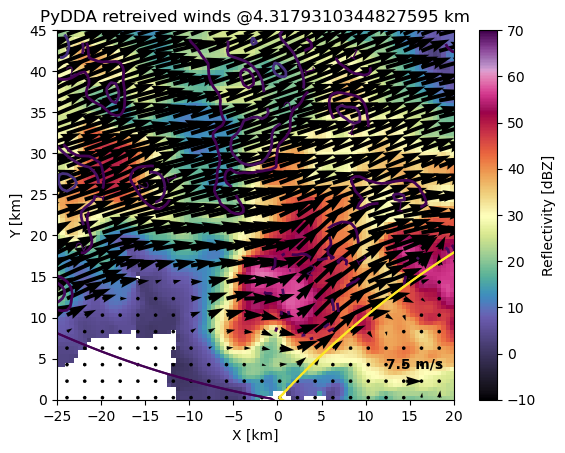

pydda-202505202310.nc
Interpolating sounding to radar grid
Interpolated U field:
tf.Tensor(
[       nan  4.5307264 11.4344845 15.301979  21.562355  23.875206
 26.482462  25.819971  28.538422  30.        30.381481  32.848923
 33.17398   32.373234  27.429451  28.3827    30.325945  27.802431
 21.681234  22.78611   25.718634  28.756817  26.373087  26.310108
 25.113314  33.57475   34.139362  39.02031   30.191198  27.088177 ], shape=(30,), dtype=float32)
Interpolated V field:
tf.Tensor(
[           nan  9.7008705e+00  1.5174075e+01  1.4776947e+01
  1.0986574e+01  9.1648293e+00  6.1139612e+00  5.0188894e+00
  1.4956403e+00 -3.5774642e-07  1.0609528e+00  2.8739071e+00
  4.6623039e+00  7.4739542e+00  1.4375213e+00  9.9115330e-01
  2.1205988e+00  4.5414308e-01 -8.7597809e+00 -7.9570425e-01
 -4.9991927e+00 -5.0706024e+00 -6.0887113e+00 -1.1714015e+01
 -9.6400938e+00 -4.7186298e+00 -6.6360159e+00 -7.5847745e+00
 -2.6413875e+00  1.4196359e+00], shape=(30,), dtype=float32)
Grid levels:
[    0.      

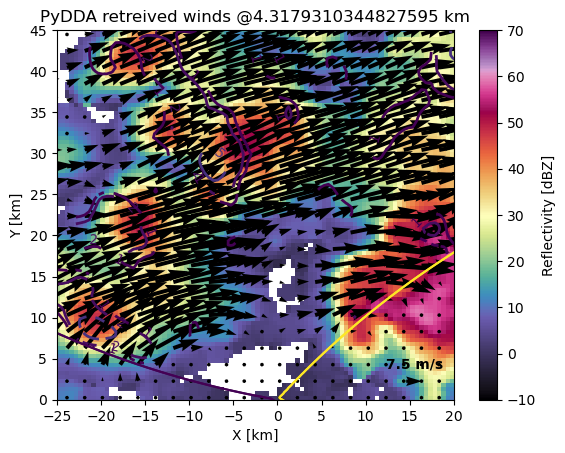

pydda-202505202320.nc


In [280]:
for time in time_matching:
    single_time = time_matching[time]
    process_dda(nexrad_grids[single_time["nexrad"]],
                csapr_grids[single_time["csapr"]],
                f"pydda-20250520{time}.nc")

## Analyze the output
Now that we have output, let's open it up!

### Fix the times
For some reason, the times are messed up; this uses the file path to help us add time back into our dataset properly.

In [33]:
files = sorted(glob.glob("pydda*"))
for file in files:
    ds = xr.open_dataset(file)
    ds["time"]  = [pd.to_datetime(file.split("-")[-1].split(".")[0]) + timedelta(minutes=2)]
    outfile = pd.to_datetime(ds.time.values[0]).strftime("dda-analysis-%Y%m%d-%H%M.nc")
    ds.to_netcdf(outfile)

### Open the dataset
Now that we have fixed times, we can easily load this in! I transferred this to `/data/project/ARM_Summer_School_2025/radar/dda/pydda`

In [38]:
ds = xr.open_mfdataset(sorted(glob.glob("/data/project/ARM_Summer_School_2025/radar/dda/pydda/*")))

### Visualize a slice of data
We can take a slice through ~3 km using xarray

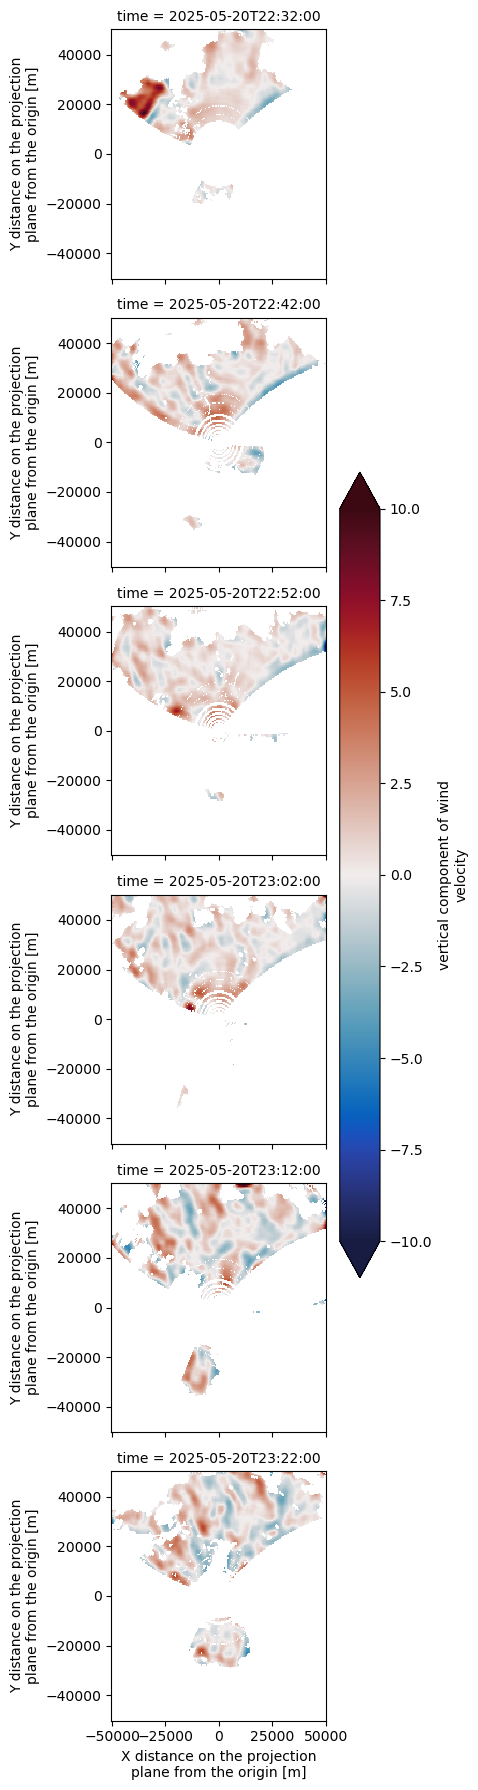

In [39]:
ds.sel(z=3000,
       method="nearest",
      ).w.plot(row="time",
               vmin=-10,
               cmap="balance",
       vmax=10)